In [ ]:
# This cell is for loading all imports. Run everytime a new import is loaded.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
# Loading datasets

from google.colab import drive
drive.mount('/content/drive')

london_we = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/london_weekends.csv')
london_wd = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/london_weekdays.csv')

paris_we = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/paris_weekends.csv')
paris_wd = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/paris_weekdays.csv')

rome_we = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/rome_weekends.csv')
rome_wd = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/rome_weekdays.csv')

athens_we = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/athens_weekends.csv')
athens_wd = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/athens_weekdays.csv')

amsterdam_we = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/amsterdam_weekends.csv')
amsterdam_wd = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/amsterdam_weekdays.csv')

barcelona_we = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/barcelona_weekends.csv')
barcelona_wd = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/barcelona_weekdays.csv')

vienna_we = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/vienna_weekends.csv')
vienna_wd = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/vienna_weekdays.csv')

lisbon_we = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/lisbon_weekends.csv')
lisbon_wd = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/lisbon_weekdays.csv')

budapest_we = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/budapest_weekends.csv')
budapest_wd = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/budapest_weekdays.csv')

berlin_we = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/berlin_weekends.csv')
berlin_wd = pd.read_csv('/content/drive/MyDrive/airbnb-europe-data/berlin_weekdays.csv')

Mounted at /content/drive


In [ ]:
# Combining all datasets into a single DataFrame

london_we['week_time'] = 'weekend'
london_wd['week_time'] = 'weekday'
london_list = [london_we, london_wd]
london = pd.concat(london_list)
london['city'] = 'London'

paris_we['week_time'] = 'weekend'
paris_wd['week_time'] = 'weekday'
paris_list = [paris_we, paris_wd]
paris = pd.concat(paris_list)
paris['city'] = 'Paris'

rome_we['week_time'] = 'weekend'
rome_wd['week_time'] = 'weekday'
rome_list = [rome_we, rome_wd]
rome = pd.concat(rome_list)
rome['city'] = 'Rome'

athens_we['week_time'] = 'weekend'
athens_wd['week_time'] = 'weekday'
athens_list = [athens_we, athens_wd]
athens = pd.concat(athens_list)
athens['city'] = 'Athens'

amsterdam_we['week_time'] = 'weekend'
amsterdam_wd['week_time'] = 'weekday'
amsterdam_list = [amsterdam_we, amsterdam_wd]
amsterdam = pd.concat(amsterdam_list)
amsterdam['city'] = 'Amsterdam'

barcelona_we['week_time'] = 'weekend'
barcelona_wd['week_time'] = 'weekday'
barcelona_list = [barcelona_we, barcelona_wd]
barcelona = pd.concat(barcelona_list)
barcelona['city'] = 'Barcelona'

vienna_we['week_time'] = 'weekend'
vienna_wd['week_time'] = 'weekday'
vienna_list = [vienna_we, vienna_wd]
vienna = pd.concat(vienna_list)
vienna['city'] = 'Vienna'

lisbon_we['week_time'] = 'weekend'
lisbon_wd['week_time'] = 'weekday'
lisbon_list = [lisbon_we, lisbon_wd]
lisbon = pd.concat(lisbon_list)
lisbon['city'] = 'Lisbon'

budapest_we['week_time'] = 'weekend'
budapest_wd['week_time'] = 'weekday'
budapest_list = [budapest_we, budapest_wd]
budapest = pd.concat(budapest_list)
budapest['city'] = 'Budapest'

berlin_we['week_time'] = 'weekend'
berlin_wd['week_time'] = 'weekday'
berlin_list = [berlin_we, berlin_wd]
berlin = pd.concat(berlin_list)
berlin['city'] = 'Berlin'

data_list = [london, paris, rome, athens, amsterdam, barcelona, vienna, lisbon, budapest, berlin]
combined_data = pd.concat(data_list, ignore_index=True)

In [ ]:
# Checking the combined dataset

print(combined_data.info())
print(combined_data.head())
print(combined_data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [ ]:
# Dropping the column 'Unnamed: 0' as it is redundant
# Dropping the columns attr_index_norm and rest_index_norm as there are
# non-normalized columns of the same values and we will apply feature scaling

combined_data.drop(columns=['Unnamed: 0','attr_index_norm','rest_index_norm'], inplace=True)

print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

In [ ]:
# One hot encoding categorical columns

encoder = OneHotEncoder(sparse_output=False)
cat_data = combined_data.select_dtypes(include=[object])
cat_columns = combined_data.select_dtypes(include=[object]).columns.tolist()

cat_1hot = encoder.fit_transform(cat_data)
cat_1hot = pd.DataFrame(cat_1hot, columns=encoder.get_feature_names_out(cat_columns))

europe_data = pd.concat([combined_data, cat_1hot], axis=1)
europe_data.drop(columns=combined_data.select_dtypes(include=[object]), inplace=True)

In [ ]:
print(europe_data.info())
print(europe_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_shared                 51707 non-null  bool   
 2   room_private                51707 non-null  bool   
 3   person_capacity             51707 non-null  float64
 4   host_is_superhost           51707 non-null  bool   
 5   multi                       51707 non-null  int64  
 6   biz                         51707 non-null  int64  
 7   cleanliness_rating          51707 non-null  float64
 8   guest_satisfaction_overall  51707 non-null  float64
 9   bedrooms                    51707 non-null  int64  
 10  dist                        51707 non-null  float64
 11  metro_dist                  51707 non-null  float64
 12  attr_index                  51707 non-null  float64
 13  rest_index                  517

realSum                       1.000000
bedrooms                      0.221653
lat                           0.211805
person_capacity               0.203077
city_Amsterdam                0.183056
attr_index                    0.178228
room_type_Entire home/apt     0.177340
rest_index                    0.134722
city_Paris                    0.132400
city_London                   0.123263
biz                           0.037144
week_time_weekend             0.012626
city_Barcelona                0.010186
guest_satisfaction_overall   -0.001888
cleanliness_rating           -0.006082
week_time_weekday            -0.012626
city_Berlin                  -0.024178
city_Vienna                  -0.031644
room_type_Shared room        -0.035095
room_shared                  -0.035095
dist                         -0.044725
city_Lisbon                  -0.045001
host_is_superhost            -0.045478
multi                        -0.052926
metro_dist                   -0.061025
city_Budapest            

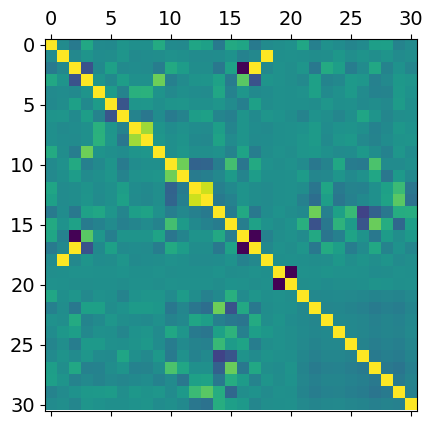

In [ ]:
# Correlation matrix

corr_matrix = europe_data.corr()

print(corr_matrix['realSum'].sort_values(ascending=False))

plt.matshow(corr_matrix)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('corr_mat.png')
plt.show()

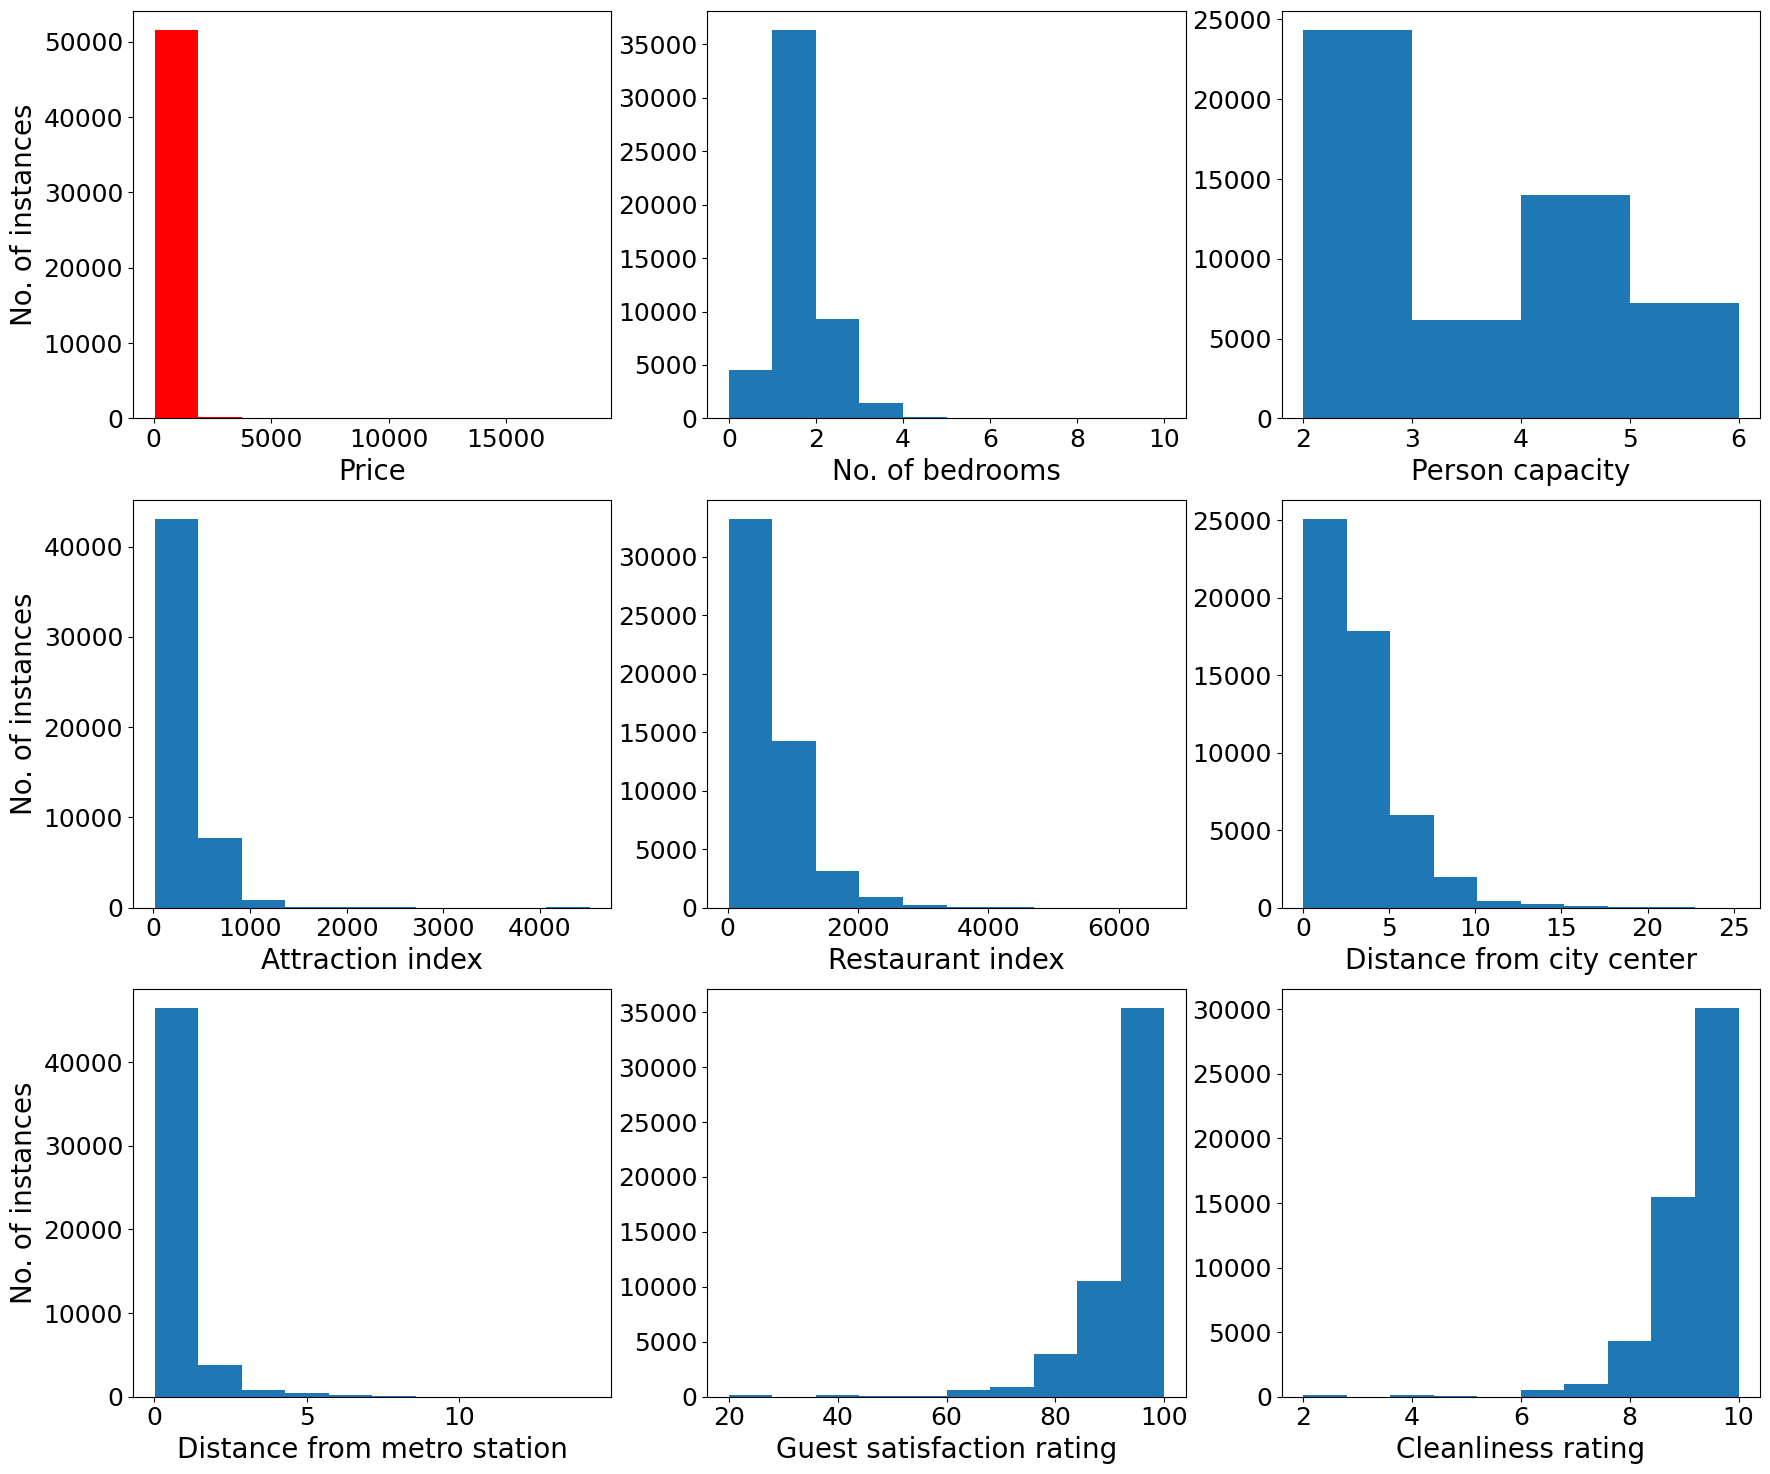

In [ ]:
# Feature visualization

fig, axs = plt.subplots(3,3, figsize=(21,18))

axs[0,0].hist(europe_data['realSum'], color='r')
axs[0,0].set_xlabel('Price', fontsize=20)
axs[0,0].set_ylabel('No. of instances', fontsize=20)
axs[0,0].tick_params(labelsize=18)

axs[0,1].hist(europe_data['bedrooms'])
axs[0,1].set_xlabel('No. of bedrooms', fontsize=20)
axs[0,1].tick_params(labelsize=18)

axs[0,2].hist(europe_data['person_capacity'], bins=4)
axs[0,2].set_xlabel('Person capacity', fontsize=20)
axs[0,2].tick_params(labelsize=18)

axs[1,0].hist(europe_data['attr_index'])
axs[1,0].set_xlabel('Attraction index', fontsize=20)
axs[1,0].set_ylabel('No. of instances', fontsize=20)
axs[1,0].tick_params(labelsize=18)

axs[1,1].hist(europe_data['rest_index'])
axs[1,1].set_xlabel('Restaurant index', fontsize=20)
axs[1,1].tick_params(labelsize=18)

axs[1,2].hist(europe_data['dist'])
axs[1,2].set_xlabel('Distance from city center', fontsize=20)
axs[1,2].tick_params(labelsize=18)

axs[2,0].hist(europe_data['metro_dist'])
axs[2,0].set_xlabel('Distance from metro station', fontsize=20)
axs[2,0].set_ylabel('No. of instances', fontsize=20)
axs[2,0].tick_params(labelsize=18)

axs[2,1].hist(europe_data['guest_satisfaction_overall'])
axs[2,1].set_xlabel('Guest satisfaction rating', fontsize=20)
axs[2,1].tick_params(labelsize=18)

axs[2,2].hist(europe_data['cleanliness_rating'])
axs[2,2].set_xlabel('Cleanliness rating', fontsize=20)
axs[2,2].tick_params(labelsize=18)

plt.savefig('features_hist.png')
plt.show()

In [ ]:
# Feature scaling and transformation

europe_data_2 = europe_data.copy()

europe_data_2['realSum'] = np.log(europe_data_2['realSum'])
europe_data_2['attr_index'] = np.log(europe_data_2['attr_index'])
europe_data_2['rest_index'] = np.log(europe_data_2['rest_index'])
europe_data_2['dist'] = np.log(europe_data_2['dist'])
europe_data_2['metro_dist'] = np.log(europe_data_2['metro_dist'])

price = europe_data_2['realSum']
europe_data_2.drop(columns=['realSum'], inplace=True)

scaler = StandardScaler()

features_to_scale = ['bedrooms', 'person_capacity', 'attr_index',
                     'rest_index', 'dist', 'metro_dist', 'lat', 'lng',
                     'guest_satisfaction_overall', 'cleanliness_rating'
                    ]

features_not_to_scale = ['room_shared', 'room_private', 'host_is_superhost',
                         'multi', 'biz', 'room_type_Entire home/apt',
                         'room_type_Private room', 'room_type_Shared room',
                         'week_time_weekday', 'week_time_weekend',
                         'city_Amsterdam', 'city_Athens', 'city_Barcelona',
                         'city_Berlin', 'city_Budapest', 'city_Lisbon',
                         'city_London', 'city_Paris', 'city_Rome', 'city_Vienna'
                        ]

scaled_features = pd.DataFrame(scaler.fit_transform(europe_data_2[features_to_scale]), columns=features_to_scale)
print(scaled_features.head())

europe_data_final = pd.concat([scaled_features.reset_index(drop=True),  europe_data_2[features_not_to_scale].reset_index(drop=True)], axis=1)
print(europe_data_final.head())
print(price.head())

   bedrooms  person_capacity  attr_index  rest_index      dist  metro_dist  \
0 -0.253043        -0.894595   -0.034189    0.044958  1.067840   -0.005205   
1 -0.253043        -0.894595    0.040674    0.183351  0.847567    1.335422   
2 -0.253043        -0.124495    0.223318    0.223585  0.797470    0.027822   
3 -0.253043        -0.894595    0.996050    0.938217 -0.187125   -1.327494   
4 -1.846911        -0.124495    0.455393    0.491407  0.769104   -0.238711   

        lat       lng  guest_satisfaction_overall  cleanliness_rating  
0  1.115324 -0.762867                   -2.641370           -3.550915  
1  1.118448 -0.766439                    0.376926            0.638184  
2  1.119576 -0.772674                    0.265137            0.638184  
3  1.114444 -0.768619                   -0.629173           -0.409091  
4  1.109283 -0.776972                   -3.088525           -2.503640  
   bedrooms  person_capacity  attr_index  rest_index      dist  metro_dist  \
0 -0.253043        -0

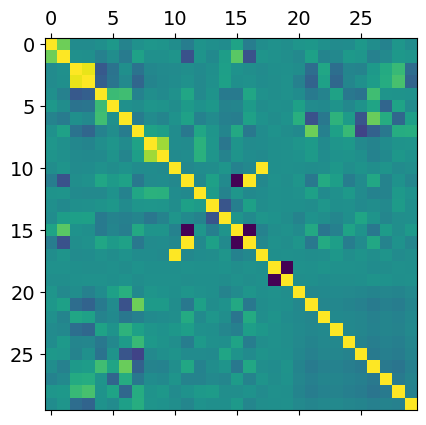

In [ ]:
corr_matrix_scaled = europe_data_final.corr()

plt.matshow(corr_matrix_scaled)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('corr_mat_scaled.png')
plt.show()

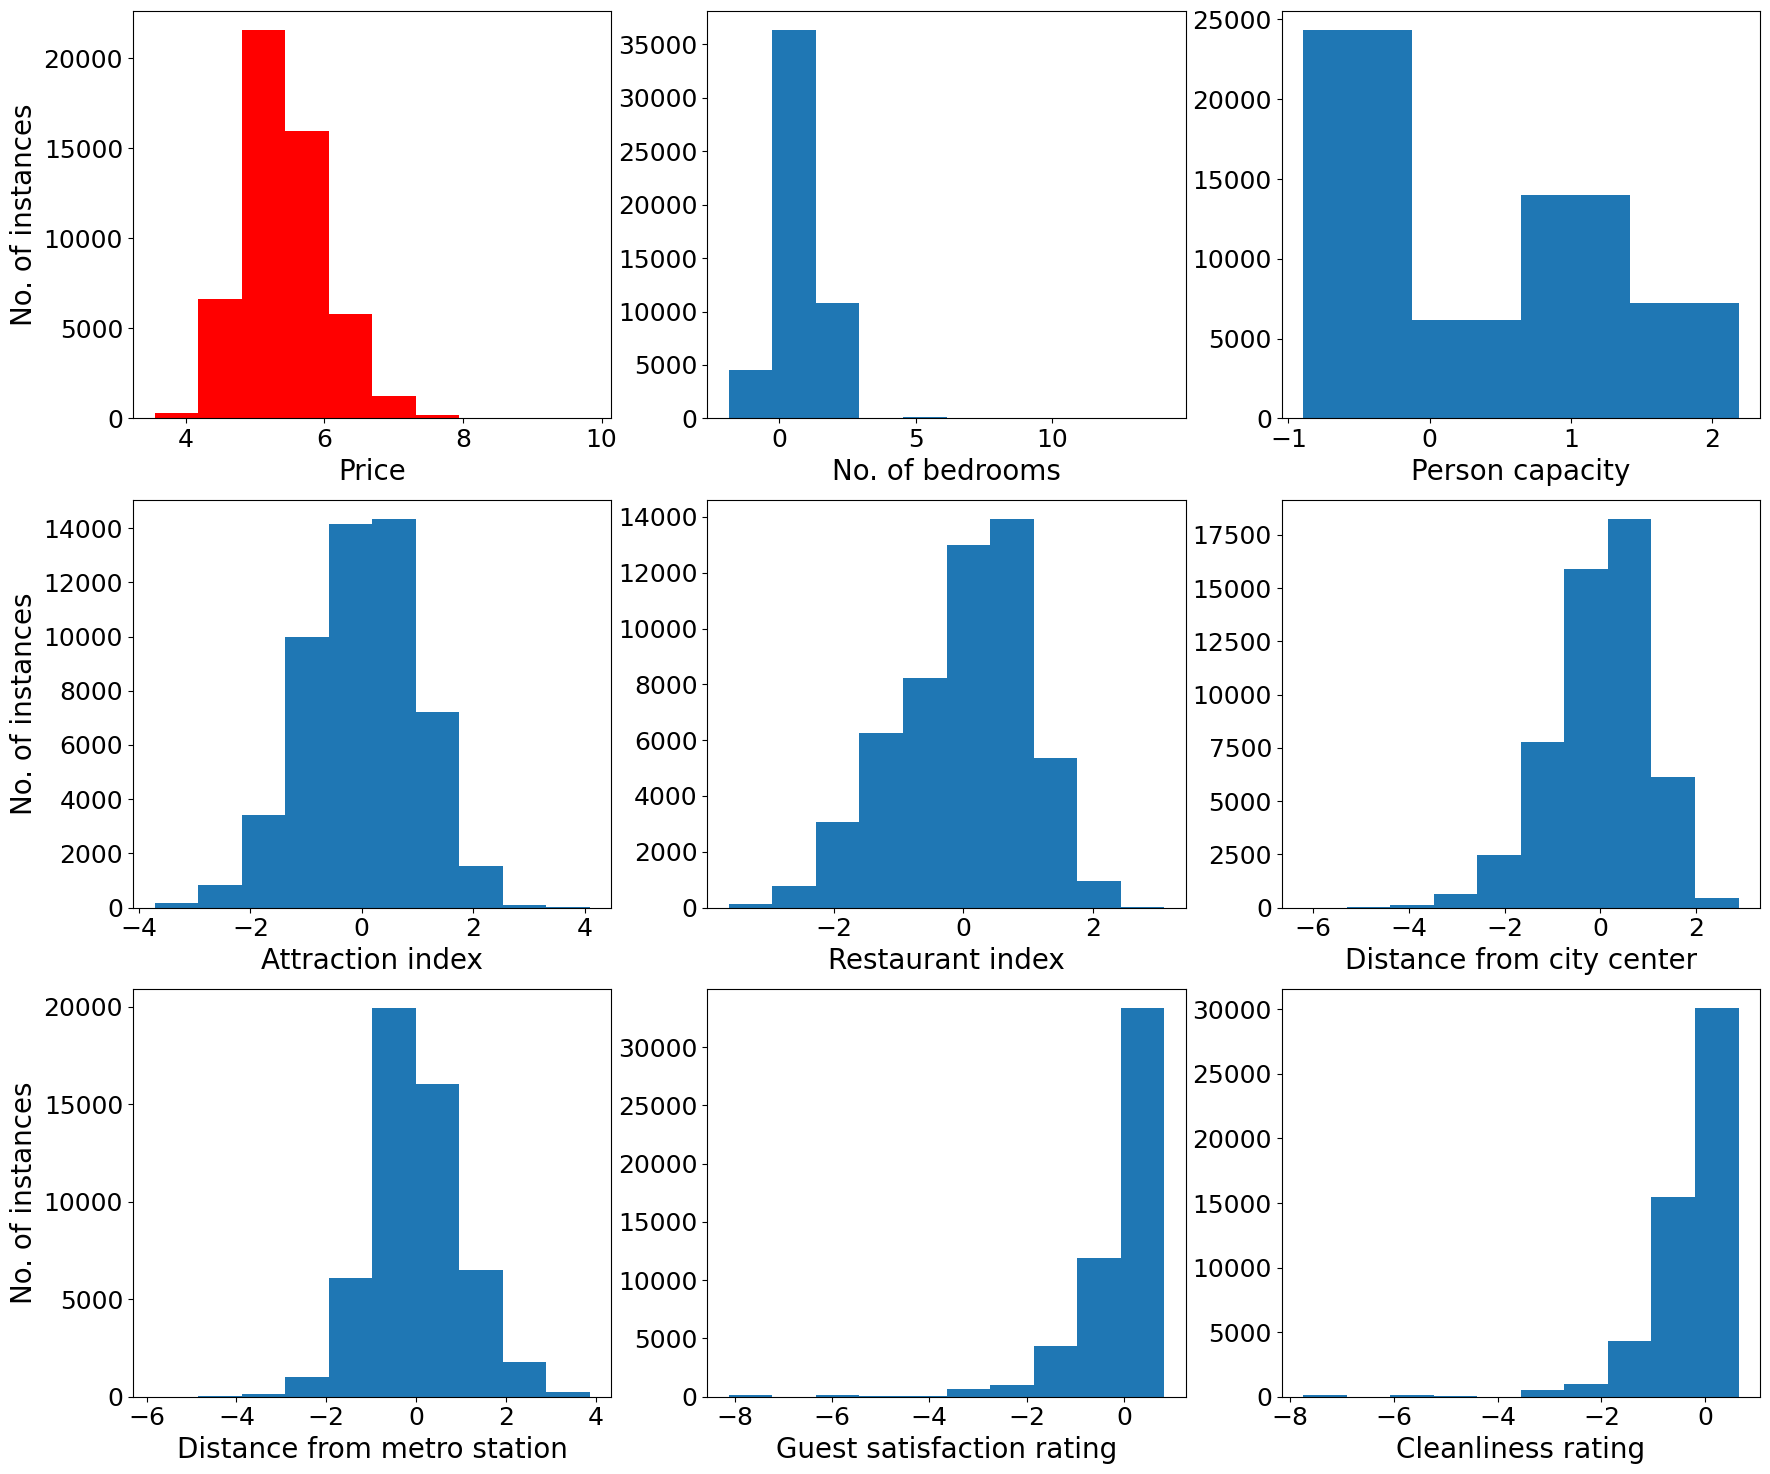

In [ ]:
# Feature visualization

fig, axs = plt.subplots(3,3, figsize=(21,18))

axs[0,0].hist(price, color='r')
axs[0,0].set_xlabel('Price', fontsize=20)
axs[0,0].set_ylabel('No. of instances', fontsize=20)
axs[0,0].tick_params(labelsize=18)

axs[0,1].hist(europe_data_final['bedrooms'])
axs[0,1].set_xlabel('No. of bedrooms', fontsize=20)
axs[0,1].tick_params(labelsize=18)

axs[0,2].hist(europe_data_final['person_capacity'], bins=4)
axs[0,2].set_xlabel('Person capacity', fontsize=20)
axs[0,2].tick_params(labelsize=18)

axs[1,0].hist(europe_data_final['attr_index'])
axs[1,0].set_xlabel('Attraction index', fontsize=20)
axs[1,0].set_ylabel('No. of instances', fontsize=20)
axs[1,0].tick_params(labelsize=18)

axs[1,1].hist(europe_data_final['rest_index'])
axs[1,1].set_xlabel('Restaurant index', fontsize=20)
axs[1,1].tick_params(labelsize=18)

axs[1,2].hist(europe_data_final['dist'])
axs[1,2].set_xlabel('Distance from city center', fontsize=20)
axs[1,2].tick_params(labelsize=18)

axs[2,0].hist(europe_data_final['metro_dist'])
axs[2,0].set_xlabel('Distance from metro station', fontsize=20)
axs[2,0].set_ylabel('No. of instances', fontsize=20)
axs[2,0].tick_params(labelsize=18)

axs[2,1].hist(europe_data_final['guest_satisfaction_overall'])
axs[2,1].set_xlabel('Guest satisfaction rating', fontsize=20)
axs[2,1].tick_params(labelsize=18)

axs[2,2].hist(europe_data_final['cleanliness_rating'])
axs[2,2].set_xlabel('Cleanliness rating', fontsize=20)
axs[2,2].tick_params(labelsize=18)

plt.savefig('features_scaled_hist.png')
plt.show()

In [ ]:
# Split dataset into training and testing set

X_train, X_test, y_train, y_test = train_test_split(europe_data_final, price, test_size=0.20, random_state=42)

print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

       bedrooms  person_capacity  attr_index  rest_index      dist  \
31605 -0.253043        -0.894595    0.246734   -0.311420 -0.123836   
42714  1.340826        -0.124495   -1.865109   -1.526844  1.137803   
5234  -0.253043        -0.124495   -0.266975   -0.005493  1.270120   
24047 -0.253043        -0.894595    0.781930    1.003151 -2.157635   
18303 -0.253043        -0.894595   -0.185941    0.165321  1.008252   

       metro_dist       lat       lng  guest_satisfaction_overall  \
31605    0.466460  1.273174 -0.257740                    0.824081   
42714   -0.310876 -1.315989 -1.693074                    0.824081   
5234    -1.431533  1.111645 -0.780740                    0.153348   
24047   -0.142480 -0.717858  0.518415                   -8.119019   
18303   -0.257883 -0.726712  0.515118                    0.488714   

       cleanliness_rating  ...  city_Amsterdam  city_Athens  city_Barcelona  \
31605           -1.456366  ...             1.0          0.0             0.0   
42714 

In [ ]:
# Model 1

linear_regressor = LinearRegression()

lin_reg_train = linear_regressor.fit(X_train, y_train)

lr_predictions_train = linear_regressor.predict(X_train)
lr_predictions_test = linear_regressor.predict(X_test)


r2_lr_train = r2_score(y_train, lr_predictions_train)
r2_lr_test = r2_score(y_test, lr_predictions_test)

print(r2_lr_train)
print(r2_lr_test)

0.664031624134803
0.6561753504467334


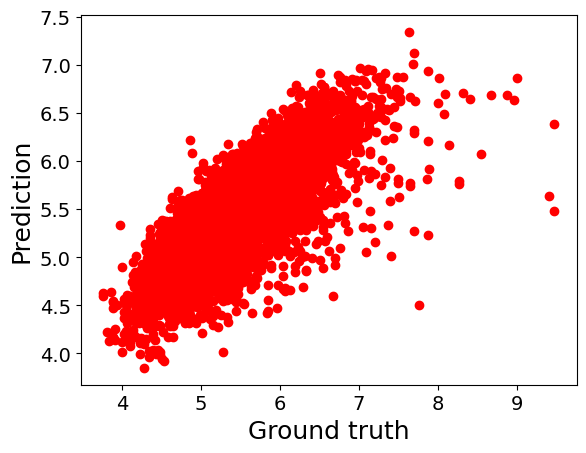

In [ ]:
# Model 1 visualization

plt.figure(1)
plt.scatter(y_test, lr_predictions_test, color='r')
plt.xlabel('Ground truth', fontsize=18)
plt.ylabel('Prediction', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('lin_reg.png')
plt.show()

In [ ]:
# Model 2

ridge_regressor = Ridge(alpha=1.0)

ridge_reg_train = ridge_regressor.fit(X_train, y_train)

rr_predictions_train = ridge_regressor.predict(X_train)
rr_predictions_test = ridge_regressor.predict(X_test)

r2_rr_train = r2_score(y_train, rr_predictions_train)
r2_rr_test = r2_score(y_test, rr_predictions_test)

print(r2_rr_train)
print(r2_rr_test)

0.6618546685971572
0.6531828555491945


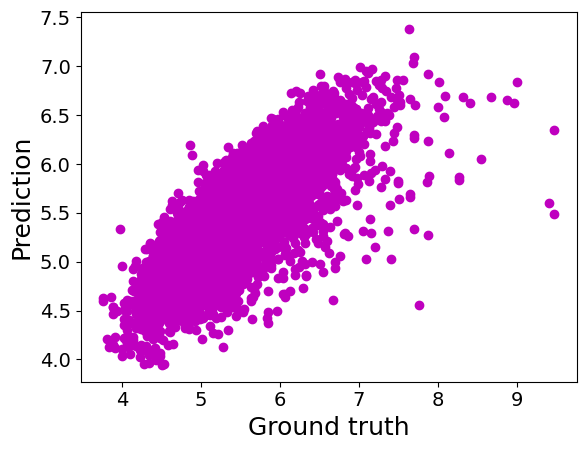

In [ ]:
# Model 2 visualization

plt.figure(1)
plt.scatter(y_test, rr_predictions_test, color='m')
plt.xlabel('Ground truth', fontsize=18)
plt.ylabel('Prediction', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('ridge_reg.png')
plt.show()

In [ ]:
# Model 3.1

svr_regressor_1 = SVR(kernel='rbf')

svr_reg_train_1 = svr_regressor_1.fit(X_train, y_train)

svr_predictions_1_train = svr_regressor_1.predict(X_train)
svr_predictions_1_test = svr_regressor_1.predict(X_test)

r2_svr_reg_1_train = r2_score(y_train, svr_predictions_1_train)
r2_svr_reg_1_test = r2_score(y_test, svr_predictions_1_test)

print(r2_svr_reg_1_train)
print(r2_svr_reg_1_test)

0.7603531625792226
0.7295366793021778


In [ ]:
# Model 3.2

svr_regressor_2 = SVR(kernel='linear')

svr_reg_train_2 = svr_regressor_2.fit(X_train, y_train)

svr_predictions_2_train = svr_regressor_2.predict(X_train)
svr_predictions_2_test = svr_regressor_2.predict(X_test)

r2_svr_reg_2_train = r2_score(y_train, svr_predictions_2_train)
r2_svr_reg_2_test = r2_score(y_test, svr_predictions_2_test)

print(r2_svr_reg_2_train)
print(r2_svr_reg_2_test)

0.6587519416749521
0.6493022142379954


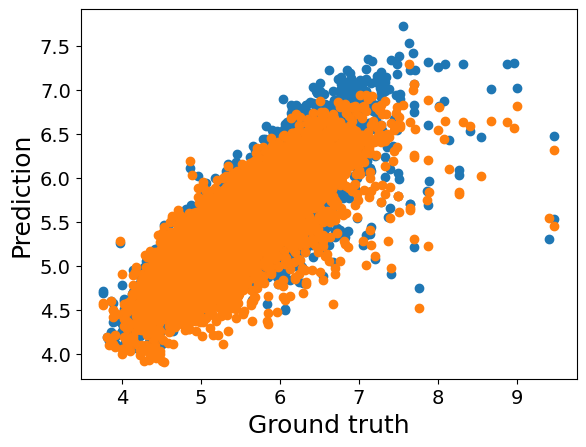

In [ ]:
# Model 3 visualization

plt.figure(4)

plt.scatter(y_test, svr_predictions_1_test)
plt.xlabel('Ground truth', fontsize=18)
plt.ylabel('Prediction', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.scatter(y_test, svr_predictions_2_test)
plt.xlabel('Ground truth', fontsize=18)
plt.ylabel('Prediction', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('svr.png')

plt.show()

In [ ]:
# Model 4

tree_regressor = DecisionTreeRegressor(random_state=42)

tree_reg_train = tree_regressor.fit(X_train, y_train)

dt_predictions_train = tree_regressor.predict(X_train)
dt_predictions_test = tree_regressor.predict(X_test)

r2_tree_reg_train = r2_score(y_train, dt_predictions_train)
r2_tree_reg_test = r2_score(y_test, dt_predictions_test)

print(r2_tree_reg_train)
print(r2_tree_reg_test)

1.0
0.7664810057858715


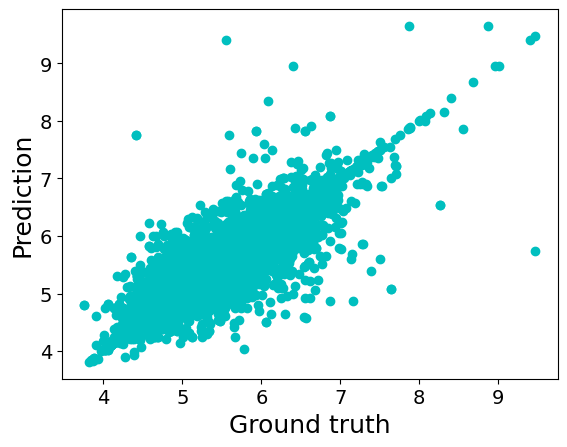

In [ ]:
# Model 4 visualization

plt.figure(1)
plt.scatter(y_test, dt_predictions_test, color='c')
plt.xlabel('Ground truth', fontsize=18)
plt.ylabel('Prediction', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('decision_tree.png')
plt.show()

In [ ]:
# Model 5

forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

forest_reg_train = forest_regressor.fit(X_train, y_train)

rf_predictions_train = forest_regressor.predict(X_train)
rf_predictions_test = forest_regressor.predict(X_test)

r2_forest_reg_train = r2_score(y_train, rf_predictions_train)
r2_forest_reg_test = r2_score(y_test, rf_predictions_test)

print(r2_forest_reg_train)
print(r2_forest_reg_test)

0.9794772113558597
0.8545135643734632


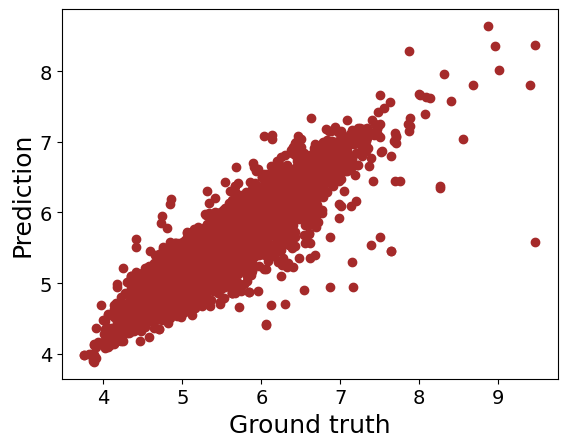

In [ ]:
# Model 5 visualization

plt.figure(1)
plt.scatter(y_test, rf_predictions_test, color='brown')
plt.xlabel('Ground truth', fontsize=18)
plt.ylabel('Prediction', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('random_forest.png')

plt.show()

In [ ]:
# Model 6

gbr_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, random_state=42)

gbr_reg_train = gbr_regressor.fit(X_train, y_train)

gbr_predictions_train = gbr_regressor.predict(X_train)
gbr_predictions_test = gbr_regressor.predict(X_test)

r2_gbr_reg_train = r2_score(y_train, gbr_predictions_train)
r2_gbr_reg_test = r2_score(y_test, gbr_predictions_test)

print(r2_gbr_reg_train)
print(r2_gbr_reg_test)

0.7694787478307914
0.7342128763619591


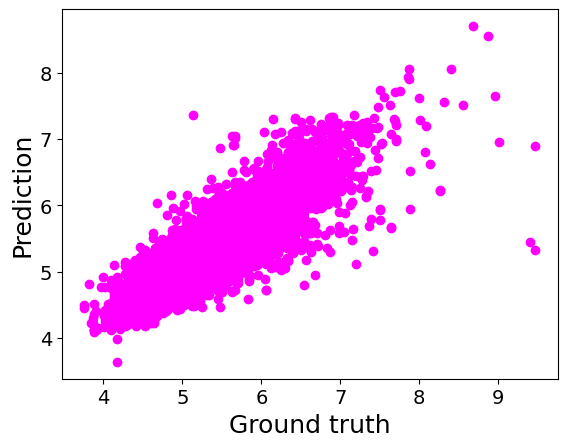

In [ ]:
# Model 6 visualization

plt.figure(1)
plt.scatter(y_test, gbr_predictions_test, color='magenta')
plt.xlabel('Ground truth', fontsize=18)
plt.ylabel('Prediction', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('gradboost.png')

plt.show()

In [ ]:
# Evaluating all models on training set and test set using the
# RMSE, MAE and R-squared performance evaluation metrics

y_train_reverted = np.exp(y_train)
y_test_reverted = np.exp(y_test)

lr_pred_reverted_train = np.exp(lr_predictions_train)
lr_pred_reverted_test = np.exp(lr_predictions_test)

rr_pred_reverted_train = np.exp(rr_predictions_train)
rr_pred_reverted_test = np.exp(rr_predictions_test)

svr_1_pred_reverted_train = np.exp(svr_predictions_1_train)
svr_1_pred_reverted_test = np.exp(svr_predictions_1_test)

svr_2_pred_reverted_train = np.exp(svr_predictions_2_train)
svr_2_pred_reverted_test = np.exp(svr_predictions_2_test)

dt_pred_reverted_train = np.exp(dt_predictions_train)
dt_pred_reverted_test = np.exp(dt_predictions_test)

rf_pred_reverted_train = np.exp(rf_predictions_train)
rf_pred_reverted_test = np.exp(rf_predictions_test)

gbr_pred_reverted_train = np.exp(gbr_predictions_train)
gbr_pred_reverted_test = np.exp(gbr_predictions_test)


print("train RMSE, Linear Regression:", np.sqrt(mean_squared_error(y_train_reverted, lr_pred_reverted_train)))
print("test RMSE, Linear Regression:", np.sqrt(mean_squared_error(y_test_reverted, lr_pred_reverted_test)))
print("\n")

print("train MAE, Linear Regression:", mean_absolute_error(y_train_reverted, lr_pred_reverted_train))
print("test MAE, Linear Regression:", mean_absolute_error(y_test_reverted, lr_pred_reverted_test))
print("\n")

print("train R-squared, Linear Regression:", r2_score(y_train, lr_predictions_train))
print("test R-squared, Linear Regression:", r2_score(y_test, lr_predictions_test))
print("\n")

print("train RMSE, Ridge Regression:", np.sqrt(mean_squared_error(y_train_reverted, rr_pred_reverted_train)))
print("test RMSE, Ridge Regression:", np.sqrt(mean_squared_error(y_test_reverted, rr_pred_reverted_test)))
print("\n")

print("train MAE, Ridge Regression:", mean_absolute_error(y_train_reverted, rr_pred_reverted_train))
print("test MAE, Ridge Regression:", mean_absolute_error(y_test_reverted, rr_pred_reverted_test))
print("\n")

print("train R-squared, Ridge Regression:", r2_score(y_train, rr_predictions_train))
print("test R-squared, Ridge Regression:", r2_score(y_test, rr_predictions_test))
print("\n")

print("train RMSE, SVR (rbf kernel):", np.sqrt(mean_squared_error(y_train_reverted, svr_1_pred_reverted_train)))
print("test RMSE, SVR (rbf kernel):", np.sqrt(mean_squared_error(y_test_reverted, svr_1_pred_reverted_test)))
print("\n")

print("train MAE, SVR (rbf kernel):", mean_absolute_error(y_train_reverted, svr_1_pred_reverted_train))
print("test MAE, SVR (rbf kernel):", mean_absolute_error(y_test_reverted, svr_1_pred_reverted_test))
print("\n")

print("train R-squared, SVR (rbf kernel):", r2_score(y_train, svr_predictions_1_train))
print("test R-squared, SVR (rbf kernel):", r2_score(y_test, svr_predictions_1_test))
print("\n")

print("train RMSE, SVR (linear kernel):", np.sqrt(mean_squared_error(y_train_reverted, svr_2_pred_reverted_train)))
print("test RMSE, SVR (linear kernel):", np.sqrt(mean_squared_error(y_test_reverted, svr_2_pred_reverted_test)))
print("\n")

print("train MAE, SVR (linear kernel):", mean_absolute_error(y_train_reverted, svr_2_pred_reverted_train))
print("test MAE, SVR (linear kernel):", mean_absolute_error(y_test_reverted, svr_2_pred_reverted_test))
print("\n")

print("train R-squared, SVR (linear kernel):", r2_score(y_train, svr_predictions_2_train))
print("test R-squared, SVR (linear kernel):", r2_score(y_test, svr_predictions_2_test))
print("\n")

print("train RMSE, Decision Tree:", np.sqrt(mean_squared_error(y_train_reverted, dt_pred_reverted_train)))
print("test RMSE, Decision Tree:", np.sqrt(mean_squared_error(y_test_reverted, dt_pred_reverted_test)))
print("\n")

print("train MAE, Decision Tree:", mean_absolute_error(y_train_reverted, dt_pred_reverted_train))
print("test MAE, Decision Tree:", mean_absolute_error(y_test_reverted, dt_pred_reverted_test))
print("\n")

print("train R-squared, Decision Tree:", r2_score(y_train, dt_predictions_train))
print("test R-squared, Decision Tree:", r2_score(y_test, dt_predictions_test))
print("\n")

print("train RMSE, Random Forest:", np.sqrt(mean_squared_error(y_train_reverted, rf_pred_reverted_train)))
print("test RMSE, Random Forest:", np.sqrt(mean_squared_error(y_test_reverted, rf_pred_reverted_test)))
print("\n")

print("train MAE, Random Forest:", mean_absolute_error(y_train_reverted, rf_pred_reverted_train))
print("test MAE, Random Forest:", mean_absolute_error(y_test_reverted, rf_pred_reverted_test))
print("\n")

print("train R-squared, Random Forest:", r2_score(y_train, rf_predictions_train))
print("test R-squared, Random Forest:", r2_score(y_test, rf_predictions_test))
print("\n")

print("train RMSE, Gradient Boosting:", np.sqrt(mean_squared_error(y_train_reverted, gbr_pred_reverted_train)))
print("test RMSE, Gradient Boosting:", np.sqrt(mean_squared_error(y_test_reverted, gbr_pred_reverted_test)))
print("\n")

print("train MAE, Gradient Boosting:", mean_absolute_error(y_train_reverted, gbr_pred_reverted_train))
print("test MAE, Gradient Boosting:", mean_absolute_error(y_test_reverted, gbr_pred_reverted_test))
print("\n")

print("train R-squared, Gradient Boosting:", r2_score(y_train, gbr_predictions_train))
print("test R-squared, Gradient Boosting:", r2_score(y_test, gbr_predictions_test))

train RMSE, Linear Regression: 277.06020820337903
test RMSE, Linear Regression: 301.51304965259527


train MAE, Linear Regression: 78.5238166141491
test MAE, Linear Regression: 83.22744866612622


train R-squared, Linear Regression: 0.664031624134803
test R-squared, Linear Regression: 0.6561753504467334


train RMSE, Ridge Regression: 277.41731645619865
test RMSE, Ridge Regression: 302.03771993932213


train MAE, Ridge Regression: 78.86374418157921
test MAE, Ridge Regression: 83.63935949989246


train R-squared, Ridge Regression: 0.6618546685971572
test R-squared, Ridge Regression: 0.6531828555491945


train RMSE, SVR (rbf kernel): 263.8613584206179
test RMSE, SVR (rbf kernel): 288.20175250305726


train MAE, SVR (rbf kernel): 64.23718853745197
test MAE, SVR (rbf kernel): 72.98605939491519


train R-squared, SVR (rbf kernel): 0.7603531625792226
test R-squared, SVR (rbf kernel): 0.7295366793021778


train RMSE, SVR (linear kernel): 278.9846219626034
test RMSE, SVR (linear kernel): 303.8

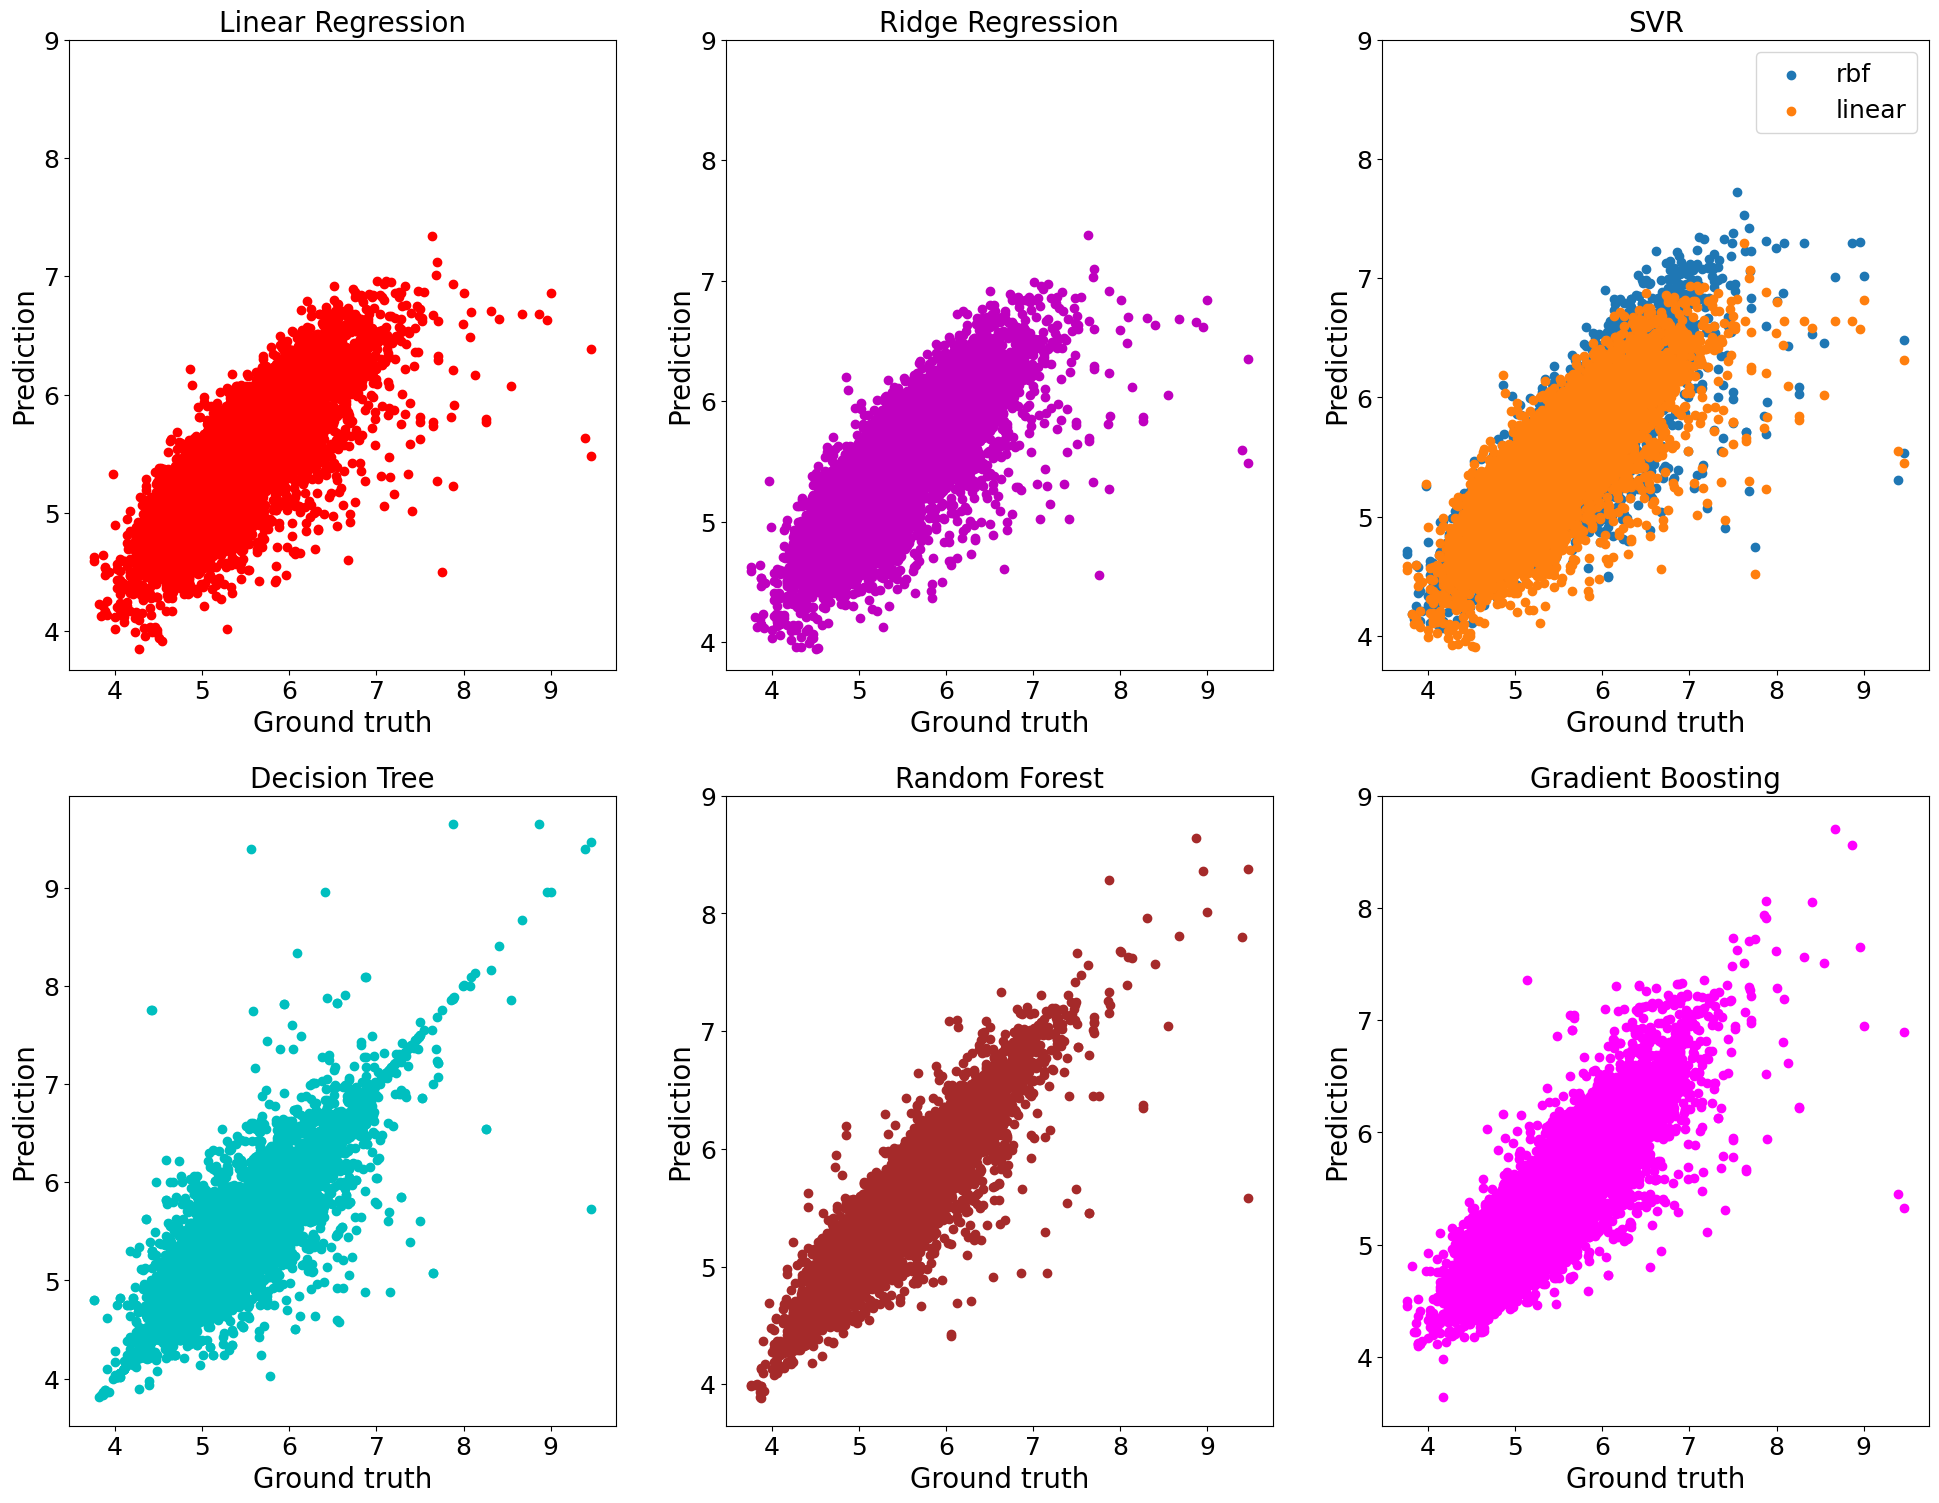

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(24,18))

axs[0,0].scatter(y_test, lr_predictions_test, color='r')
axs[0,0].set_title('Linear Regression', fontsize=20)
axs[0,0].set_xlabel('Ground truth', fontsize=20)
axs[0,0].set_ylabel('Prediction', fontsize=20)
axs[0,0].tick_params(labelsize=18)
axs[0,0].set_yticks([4, 5, 6, 7, 8, 9])

axs[0,1].scatter(y_test, rr_predictions_test, color='m')
axs[0,1].set_title('Ridge Regression', fontsize=20)
axs[0,1].set_xlabel('Ground truth', fontsize=20)
axs[0,1].set_ylabel('Prediction', fontsize=20)
axs[0,1].tick_params(labelsize=18)
axs[0,1].set_yticks([4, 5, 6, 7, 8, 9])

axs[0,2].scatter(y_test, svr_predictions_1_test)
axs[0,2].set_title('SVR', fontsize=20)
axs[0,2].scatter(y_test, svr_predictions_2_test)
axs[0,2].set_xlabel('Ground truth', fontsize=20)
axs[0,2].set_ylabel('Prediction', fontsize=20)
axs[0,2].tick_params(labelsize=18)
axs[0,2].legend(['rbf', 'linear'], loc="upper right", fontsize=18)
axs[0,2].set_yticks([4, 5, 6, 7, 8, 9])

axs[1,0].scatter(y_test, dt_predictions_test, color='c')
axs[1,0].set_title('Decision Tree', fontsize=20)
axs[1,0].set_xlabel('Ground truth', fontsize=20)
axs[1,0].set_ylabel('Prediction', fontsize=20)
axs[1,0].tick_params(labelsize=18)
axs[1,0].set_yticks([4, 5, 6, 7, 8, 9])

axs[1,1].scatter(y_test, rf_predictions_test, color='brown')
axs[1,1].set_title('Random Forest', fontsize=20)
axs[1,1].set_xlabel('Ground truth', fontsize=20)
axs[1,1].set_ylabel('Prediction', fontsize=20)
axs[1,1].tick_params(labelsize=18)
axs[1,1].set_yticks([4, 5, 6, 7, 8, 9])

axs[1,2].scatter(y_test, gbr_predictions_test, color='magenta')
axs[1,2].set_title('Gradient Boosting', fontsize=20)
axs[1,2].set_xlabel('Ground truth', fontsize=20)
axs[1,2].set_ylabel('Prediction', fontsize=20)
axs[1,2].tick_params(labelsize=18)
axs[1,2].set_yticks([4, 5, 6, 7, 8, 9])

plt.savefig('results.png')

plt.show()